In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [2]:
# Define all relevant features within an array
# Features can be selected to improve the accuracy of the model
feature_selection = [
    "Switch ID", 
    "Port Number", 
    "Received Packets", 
    "Received Bytes", 
    "Sent Bytes", 
    "Sent Packets", 
    "Port alive Duration (S)", 
    "Delta Received Packets", 
    "Delta Received Bytes", 
    "Delta Sent Bytes", 
    "Delta Sent Packets", 
    "Delta Port alive Duration (S)", 
    "Connection Point", 
    "Total Load/Rate", 
    "Total Load/Latest", 
    "Unknown Load/Rate", 
    "Unknown Load/Latest", 
    "Latest bytes counter", 
    "Active Flow Entries", 
    "Packets Looked Up", 
    "Packets Matched"
]

In [3]:
#Import Cleaned UNR IDD Dataset with Network traffic
#Explore information about Data
#Label/Attacks are labeled with numbers

#"Blackhole" = 1, "Diversion"= 2, "Normal"= 3,"Overflow"= 4, "PortScan"= 5, "TCP-SYN"= 6

#Binary Label is labeled: "Attack" = 1, "Normal" = 2

df = pd.read_csv("/Users/sinaronke/Predict Binary Label (Attack or Normal)/UNR_IDD_cleaned.csv")
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
0,12,1,132,9181,6311853,238,46,0,0,280,...,0,0,0,0,0,9,767,688,6,1
1,12,2,187,6304498,15713,171,46,146,5908166,5969,...,0,0,0,0,0,9,767,688,6,1
2,12,3,235,6311567,8030,58,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
3,12,4,59,7878,16439,182,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
4,10,1,188,6304547,16497,183,46,0,0,280,...,0,0,0,0,0,7,489,403,6,1


In [4]:
#Pending variable y with "Binary Label" (only 1 pending variable possible)
#Delete "Label" is necessary to predict "Binary Label" as y target
df = df.drop("Label", axis=1)

In [5]:
#"Attack" = 1, "Normal" = 2
df["Binary Label"].value_counts(dropna=False)

1    33453
2     3723
Name: Binary Label, dtype: int64

In [6]:
#Define X for features to train the model and define y as target for predicition
X = df[feature_selection]
y = df["Binary Label"]

In [7]:
#Split the data in training and test: ca. 1/3 test, 2/3 training data with test_size=None
#Random state = 42 everytime the same split: Necessary for comparability of models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (27882, 21)  y_train: (27882,)
X_test: (9294, 21)  y_test: (9294,)


In [8]:
#Check if dataframe splitting is random for test and training data
df.groupby(y_train).count()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Binary Label
Binary Label,,,,,,,,,,,,,,,,,,,,,
1.0,25106,25106,25106,25106,25106,25106,25106,25106,25106,25106,...,25106,25106,25106,25106,25106,25106,25106,25106,25106,25106
2.0,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,...,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776


In [9]:
df.groupby(y_test).count()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Binary Label
Binary Label,,,,,,,,,,,,,,,,,,,,,
1.0,8347,8347,8347,8347,8347,8347,8347,8347,8347,8347,...,8347,8347,8347,8347,8347,8347,8347,8347,8347,8347
2.0,947,947,947,947,947,947,947,947,947,947,...,947,947,947,947,947,947,947,947,947,947


In [22]:
#Decision Tree as a classification algorithm
#Avoid overfitting with defining parameters
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=None, min_samples_leaf=2, max_leaf_nodes= 2)
dt_clf = dt_clf.fit(X_train.values, y_train)

In [23]:
y_pred = dt_clf.predict(X_test.values)
#Accuracy Score of predicted values in model if it is normal or attack
print("Accuracy Score " +str(accuracy_score(y_test.values, y_pred)))

Accuracy Score 1.0


In [ ]:
#Show how many predictions are wrong 
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

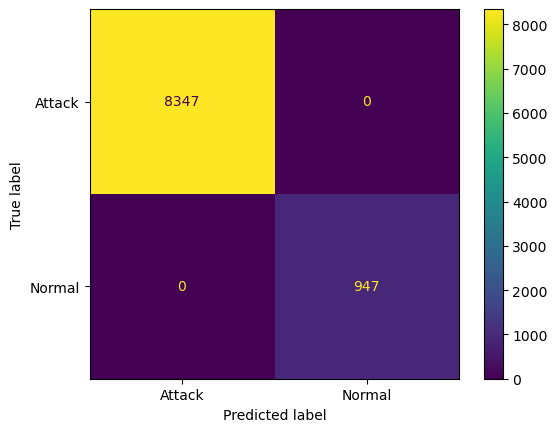

In [24]:
#Confusion Matrix shows 
#"Attack" = 1 = negative
#"Normal" = 2 = positive

#Left upper side: true negative (tn) - predicted as attack – real attack
#Left lower side: false negative (fn) -predicted as attack – real normal 
#Right upper side: false positive (fp) - predicted as normal – real attack
#Right lower side: true positive (tp) - predicted as normal – real normal

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Attack', 'Normal'])
cmd.plot()

In [13]:
y_true = y_test

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(8347, 0, 0, 947)

In [14]:
#Precision score measure the correct predicted normal (positive)
print("Precision: " +str(precision_score(y_true, y_pred, pos_label=2))) #pos_label 2 defined for normal
#p = (tp / (tp + fp))

Precision: 1.0


In [15]:
#Recall measures the ability of the classifier to predict real normal as normal
print("Recall: " +str(recall_score(y_true, y_pred, pos_label=2))) #pos_label 2 defined for normal
#r = tp / (tp + fn)

Recall: 1.0


In [16]:
#F1 Score interpreted as a harmonic mean of the precision and recall. Value between 0 (worst) and 1 (best)
print("F1 Score: " +str(f1_score(y_test, y_pred, pos_label=2))) #pos_label 2 defined for normal
#"F1 Score = (2 * ((p*r) / (p+r))))

F1 Score: 1.0


In [17]:
#False positive rate shows how often the model predict normal when it is an real attack
tnr = recall_score(y_true, y_pred, pos_label = 1) # pos_label 1 defined for attack
fpr = 1 - tnr
print("False Positive Rate: " + str(fpr))

False Positive Rate: 0.0
